In [3]:
# CMPU4091 - Visualising Data

# Objective: 
# Become familiar with using dplyr to reshape data
# Build a bar chart, treemap and stacked bar chart
# SECTION ONE: Simple explore of the base dataset
# SECTION TWO: Reshaping the data to get averages
# SECTION THREE: Building the graphs using ggplots


# Install necessary libraries if needed
if (!requireNamespace("tidyverse", quietly = TRUE)) {
  install.packages("tidyverse")
}
if (!requireNamespace("avocado", quietly = TRUE)) {
  install.packages("avocado")
}
if (!requireNamespace("zoo", quietly = TRUE)) {
  install.packages("zoo")
}
if (!requireNamespace("treemap", quietly = TRUE)) {
  install.packages("treemap")
}

# Load necessary packages
library(tidyverse)
library(avocado)
library(zoo)
library(treemap)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [4]:

# SECTION ONE: Exploring Hass Avocado sales dataset
str(avocado::hass)
View(avocado::hass)

# +--------------------END SECTION ONE-------------------------------------+


tibble [8,865 x 17] (S3: tbl_df/tbl/data.frame)
 $ week_ending      : POSIXct[1:8865], format: "2017-01-02" "2017-01-02" ...
 $ location         : chr [1:8865] "Albany" "Atlanta" "Baltimore/Washington" "Boise" ...
 $ region           : chr [1:8865] "Northeast" "Southeast" "Midsouth" "West" ...
 $ avg_price_nonorg : num [1:8865] 1.47 0.93 1.47 0.92 1.29 1.43 1.21 1.15 0.64 0.83 ...
 $ plu4046          : num [1:8865] 4846 224074 54530 27845 4120 ...
 $ plu4225          : num [1:8865] 117027 118926 408952 9409 371223 ...
 $ plu4770          : num [1:8865] 200 337 14387 11342 3934 ...
 $ small_nonorg_bag : num [1:8865] 7867 111600 151346 53093 79340 ...
 $ large_nonorg_bag : num [1:8865] 7.83 92628.91 2542.41 2793.61 213.75 ...
 $ xlarge_nonorg_bag: num [1:8865] 0 0 3.12 27.2 0 ...
 $ avg_price_org    : num [1:8865] 1.87 1.81 1.92 1.05 2.06 1.64 1.7 1.34 1.23 1.58 ...
 $ plu94046         : num [1:8865] 71.7 956.7 1420.5 0 14.8 ...
 $ plu94225         : num [1:8865] 193 2863 6298 369 2182 .

week_ending,location,region,avg_price_nonorg,plu4046,plu4225,plu4770,small_nonorg_bag,large_nonorg_bag,xlarge_nonorg_bag,avg_price_org,plu94046,plu94225,plu94770,small_org_bag,large_org_bag,xlarge_org_bag
<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-01-02,Albany,Northeast,1.47,4845.77,117027.41,200.36,7866.86,7.83,0.00,1.87,71.65,192.63,0.00,1112.42,0.00,0
2017-01-02,Atlanta,Southeast,0.93,224073.54,118926.37,337.48,111599.58,92628.91,0.00,1.81,956.73,2862.95,0.00,5.55,1517.62,0
2017-01-02,Baltimore/Washington,Midsouth,1.47,54530.42,408952.26,14387.01,151345.59,2542.41,3.12,1.92,1420.47,6298.07,325.44,5857.48,0.00,0
2017-01-02,Boise,West,0.92,27845.16,9408.92,11341.75,53093.47,2793.61,27.20,1.05,0.00,368.63,0.00,577.91,1877.28,0
2017-01-02,Boston,Northeast,1.29,4119.90,371223.34,3933.72,79339.78,213.75,0.00,2.06,14.80,2181.53,0.00,10636.25,605.64,0
2017-01-02,Buffalo/Rochester,Northeast,1.43,1285.48,58531.95,102.52,45155.38,255.65,18.06,1.64,8.52,320.56,0.00,2585.10,511.31,0
2017-01-02,Charlotte,Midsouth,1.21,47765.32,94571.69,15036.44,45920.26,13711.12,46.67,1.70,120.83,3134.68,489.12,3126.49,353.95,0
2017-01-02,Chicago,Great Lakes,1.15,87695.70,531287.44,114647.36,63550.62,1078.38,5089.37,1.34,36.67,34076.57,0.00,2802.63,0.00,0
2017-01-02,Cincinnati/Dayton,Great Lakes,0.64,2646.83,130250.60,2530.91,30669.35,163180.08,1.52,1.23,351.72,8558.19,0.00,293.33,1595.01,0


In [5]:

# SECTION TWO: Reshaping the Data

# STEP 1: Create a new dataframe filtering out only selected variables from Hass
# week_ending (date), region (US region)
# avg_price_org (average selling price in US$ for organic Hass avocados.)
avocado_data <- hass %>%
  select(week_ending, region, avg_price_org)
# hass: This is the original data set (containing avocado sales data).
# %>%: This is the pipe operator, which allows you to pass the data along the chain of commands. 
# It’s like saying "take the data and apply the next operation."
# select(): This function is used to choose which columns you want from the data. In this case, you’re selecting the columns week_ending, region, and avg_price_org (which might represent the week when data was recorded, the region, and the average price of organic avocados).


# STEP 2: Rename the columns
colnames(avocado_data) <- c('Date', 'Region', 'AveragePrice')
# colnames(): This function is used to get or set the column names of a data frame.
# avocado_data: This is the data frame whose column names you're changing.
# <- c('Date', 'Region', 'AveragePrice'): This part is assigning new names to the columns. The c() function combines the values into a vector, which in this case contains the new names you want to give the columns:
# 'Date' will replace 'week_ending'
# 'Region' will replace 'region'
# 'AveragePrice' will replace 'avg_price_org'



# STEP 3: Add Yearmon variable instead of date (e.g. 2017-01-02 becomes 2017 JAN)
avocado_data$Yearmon <- zoo::as.yearmon(avocado_data$Date)
#avocado_data$Yearmon: This part creates a new column called Yearmon in the avocado_data data frame. 
#The $ symbol is used to refer to a specific column in a data frame.
#zoo::as.yearmon(): The zoo package in R is used for working with time series data. 
#The as.yearmon() function converts a date (or datetime) to a year-month format (e.g., "2025-02"). 
#You’re calling this function from the zoo package using zoo::.
#avocado_data$Date: This is the existing column Date in the avocado_data data frame, which contains the full date 
#information (like "2025-02-05").
#The result: The conversion will store the result in the new Yearmon column, which now contains just the year
#and month portion of the Date column.




# STEP 4: Group, Summarize, and Filter Data
# Will result in an average for each year and month for each region
avocado_regional <- avocado_data %>%
  group_by(Region, Yearmon) %>%
  summarize(AveragePrice = mean(AveragePrice, na.rm = TRUE)) %>%
  filter(!is.na(Region))

#avocado_data %>%: This takes the avocado_data data frame and passes it to the next operation using the pipe operator (%>%).

#group_by(Region, Yearmon): This function groups the data by two variables:
# Region: The geographical region where the avocados are sold.
# Yearmon: The year and month, which you created earlier.
#Grouping the data means that the following operations (like summarizing) will be applied separately to each combination 
#of region and year-month.

#summarize(AveragePrice = mean(AveragePrice, na.rm = TRUE)): After grouping the data, this line calculates the 
#average price of avocados within each region and year-month combination:
  
# AveragePrice: The new name for the calculated average price column.
# mean(AveragePrice, na.rm = TRUE): This calculates the mean (average) of the AveragePrice column, while ignoring any missing values (NA).
# filter(!is.na(Region)): After summarizing the data, this line filters out any rows where the Region is missing (NA). The !is.na(Region) expression means "keep rows where Region is not missing."

# avocado_regional: The result of these operations is stored in the new data frame avocado_regional, which now contains 
# the average price of avocados by region and year-month, with missing regions exclud



# View the data
View(avocado_regional)



# STEP 5: Create a list of Regions with Average Price > 1.7
keeplist <- avocado_regional %>%
  group_by(Region) %>%
  summarize(AvgPrice = mean(AveragePrice, na.rm = TRUE)) %>%
  filter(AvgPrice > 1.7) %>%
  select(Region)

# avocado_regional %>%: This takes the avocado_regional data frame and passes it to the next operation 
# using the pipe operator (%>%).

# group_by(Region): This groups the data by the Region column, so that the following operations will 
# be applied to each region separately.

# summarize(AvgPrice = mean(AveragePrice, na.rm = TRUE)): After grouping by Region, this line 
# calculates the average avocado price for each region:
  
# AvgPrice: The new name for the calculated average price.
# mean(AveragePrice, na.rm = TRUE): This calculates the mean of the AveragePrice column, while ignoring any NA values.
# filter(AvgPrice > 1.7): After calculating the average price, this line filters the data to 
# keep only the regions where the AvgPrice is greater than 1.7. 
# This step helps to focus on regions with higher avocado prices.

# select(Region): This selects only the Region column from the filtered data, meaning the result will 
# contain just the regions that meet the condition (average price > 1.7).

# keeplist: The result of these operations is stored in the new data frame keeplist, which now 
# contains a list of regions where the average avocado price is above 1.7.




# STEP 6: Create a new final dataset with only those regions in the keeplist
df_avocado <- avocado_regional[avocado_regional$Region %in% keeplist$Region,]

# avocado_regional$Region: This refers to the Region column in the avocado_regional data frame.
# keeplist$Region: This refers to the Region column in the keeplist data frame, which contains 
# only regions where the average avocado price is greater than 1.7.
# %in%: The %in% operator is used to check if each value in the avocado_regional$Region 
# column is present in the keeplist$Region column. It returns TRUE if the value is found, and FALSE if it’s not.


#View the data
View(df_avocado)



# +--------------------END SECTION TWO -------------------------------------+



`summarise()` has grouped output by 'Region'. You can override using the
`.groups` argument.


Region,Yearmon,AveragePrice
<chr>,<yearmon>,<dbl>
California,Jan 2017,1.840500
California,Feb 2017,1.760000
California,Mar 2017,1.555000
California,Apr 2017,1.758500
California,May 2017,1.934375
California,Jun 2017,1.917500
California,Jul 2017,2.134000
California,Aug 2017,2.345000
California,Sep 2017,2.262500


Region,Yearmon,AveragePrice
<chr>,<yearmon>,<dbl>
California,Jan 2017,1.840500
California,Feb 2017,1.760000
California,Mar 2017,1.555000
California,Apr 2017,1.758500
California,May 2017,1.934375
California,Jun 2017,1.917500
California,Jul 2017,2.134000
California,Aug 2017,2.345000
California,Sep 2017,2.262500


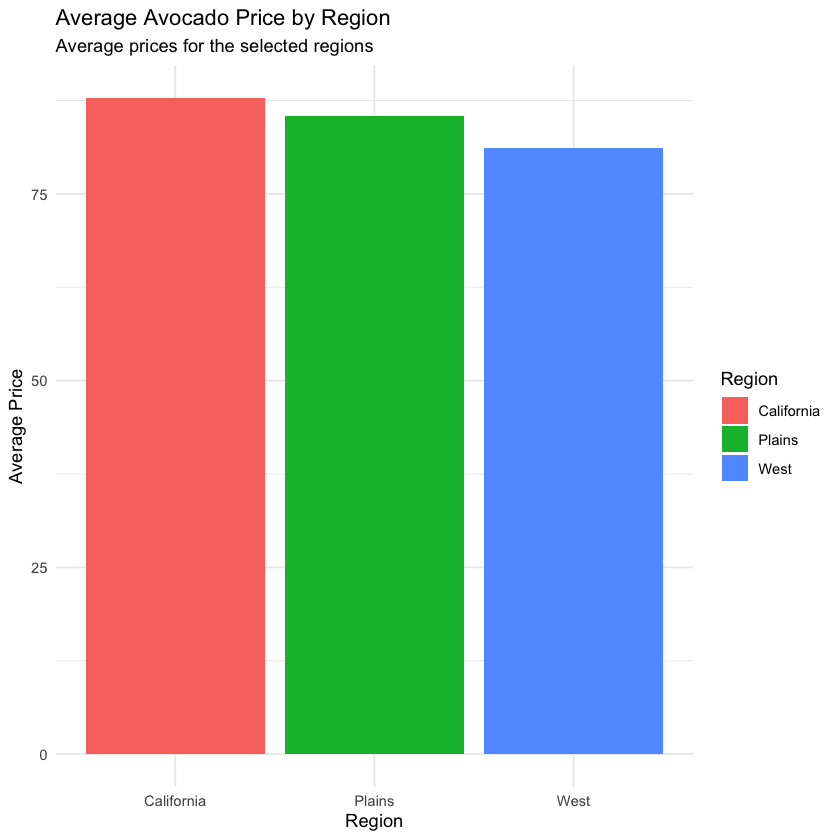

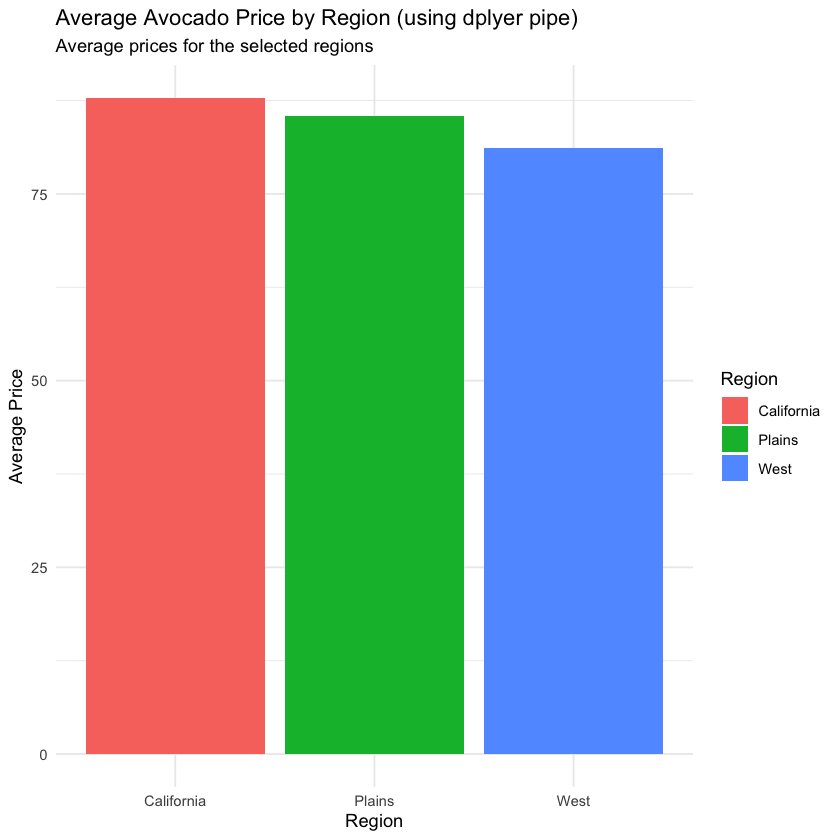

Warning message:
"The `trans` argument of `continuous_scale()` is deprecated as of ggplot2 3.5.0.
i Please use the `transform` argument instead."


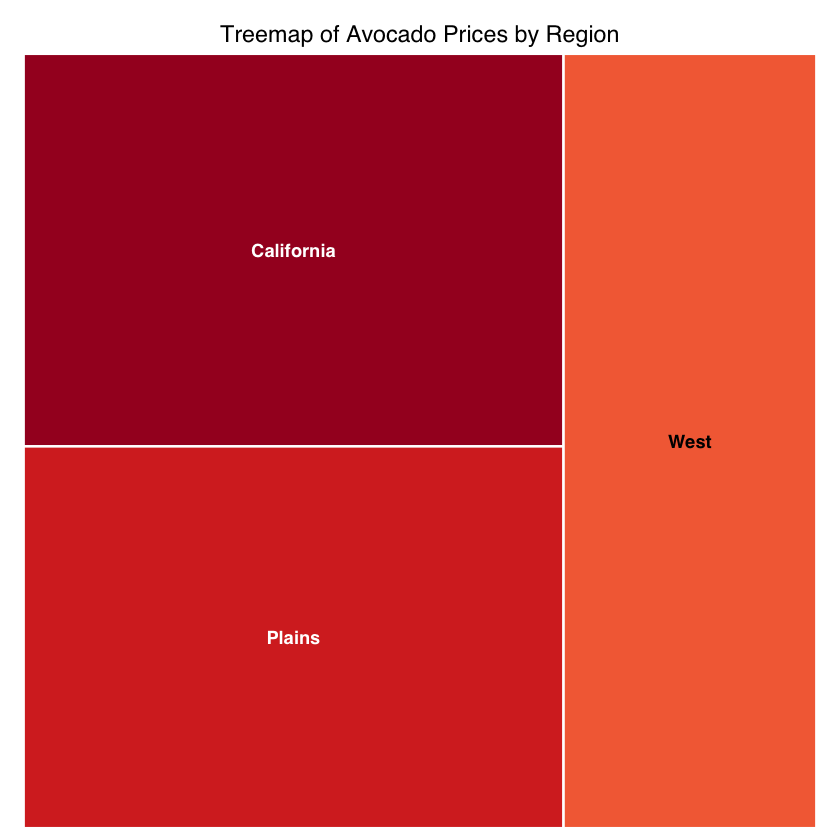

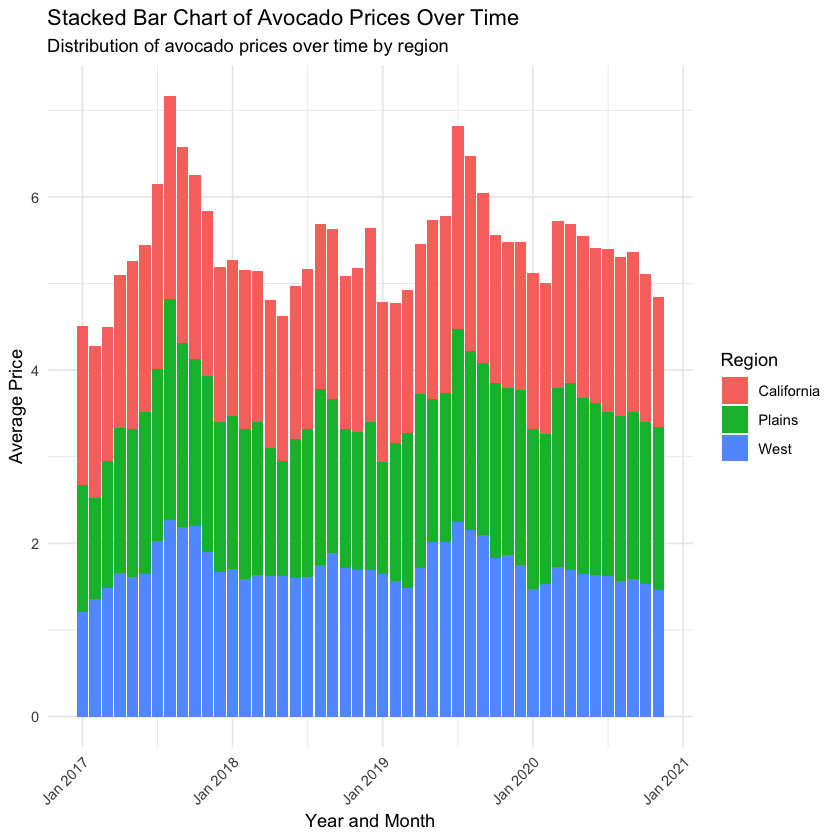

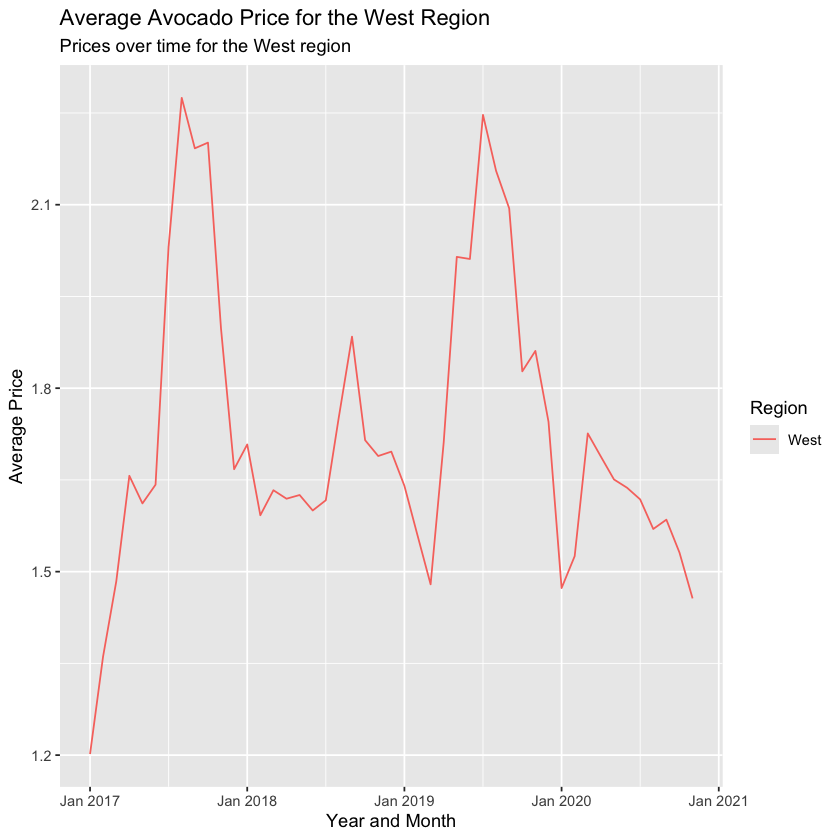

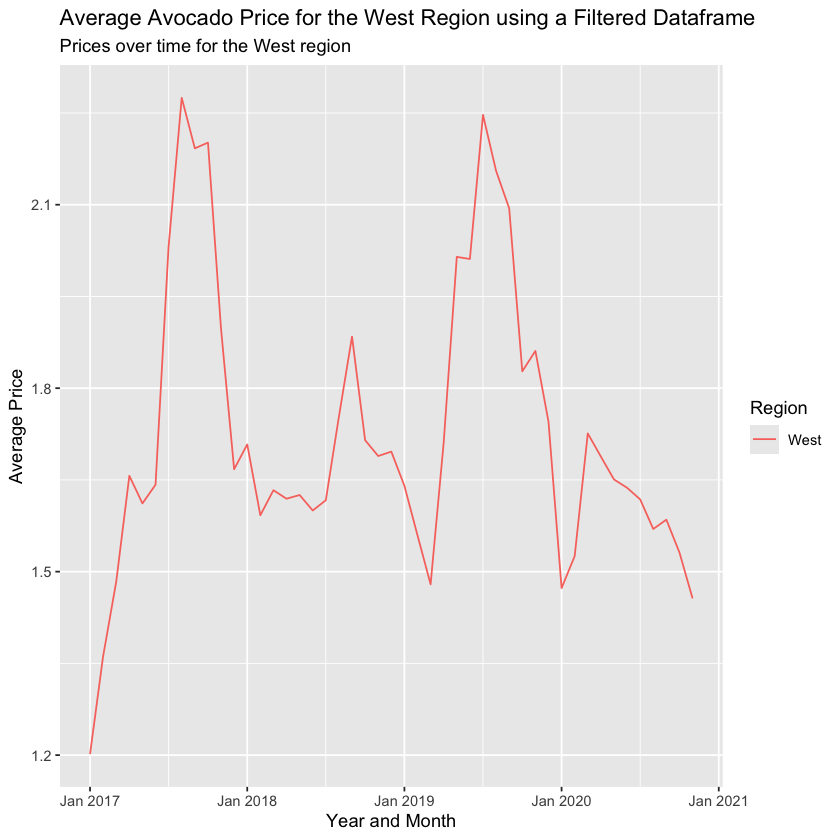

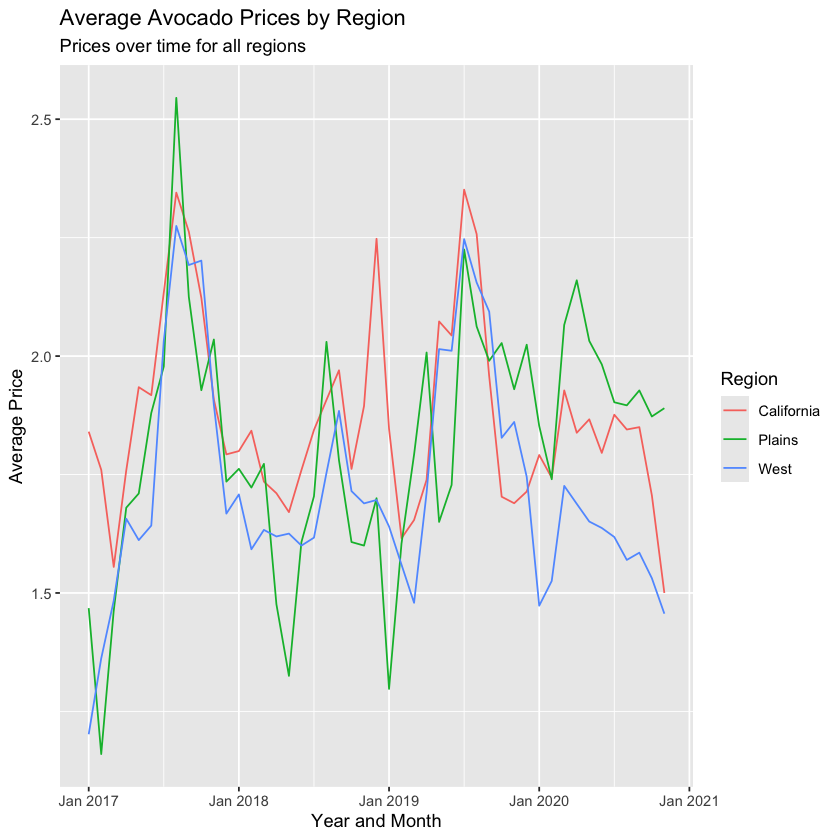

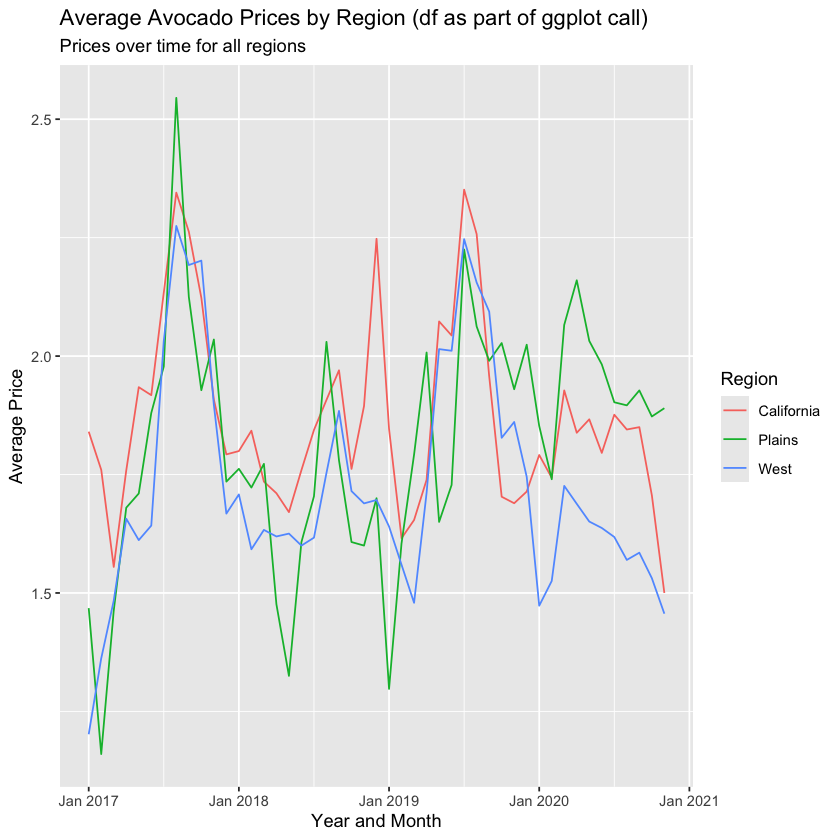

In [6]:

# SECTION THREE: Generate Plots

# **1. Bar Chart: Average Price by Region**
#This approach:
ggplot(df_avocado, aes(x = Region, y = AveragePrice, fill = Region)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Avocado Price by Region",
       subtitle = "Average prices for the selected regions",
       x = "Region",
       y = "Average Price") +
  theme_minimal()
# geom_bar() creates bar charts, where bars represent the frequency or magnitude of data.
# By default, geom_bar() will create a count of each category for a given variable on the x-axis.
# This is not suitable in our example where we are looking at averages
# The stat argument determines how the heights of the bars are calculated.
# stat = "count" (Default). It counts the occurrences of each level of the factor variable on the x-axis.
# Again this is not suitable in our case as we have already computed the statistic 
# When you set stat = "identity", it means you are passing the actual y-values to geom_bar(), and the heights of the bars are directly determined by the data in the y aesthetic.
# This is used when you already have precomputed values for the heights of the bars (e.g., averages, sums, or other statistics).

#Is the same as this approach:
df_avocado %>%
  ggplot(aes(x = Region, y = AveragePrice, fill = Region)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Avocado Price by Region (using dplyer pipe)",
       subtitle = "Average prices for the selected regions",
       x = "Region",
       y = "Average Price") +
  theme_minimal()

# **2. Treemap: Distribution of Average Prices by Region**
treemap(df_avocado,
        index = "Region",
        vSize = "AveragePrice",
        vColor = "AveragePrice",
        title = "Treemap of Avocado Prices by Region",
        palette = "RdYlGn",  # Color palette
        border.col = "white")
# The index defines the hierarchical structure of the treemap.
# Here,we are using Region as the primary grouping variable, meaning the treemap will
# have one main rectangle for each region in the dataset.
# vSize = "AveragePrice": This specifies that the size of the rectangles will be 
# determined by the AveragePrice variable in the dataset. The higher the average price, the larger the rectangle will be.
# vColor = "AveragePrice": The vColor argument sets the color of each rectangle based 
# on the AveragePrice variable. The color will vary based on the average price of avocados in each region. Higher values of AveragePrice will be colored differently (depending on the color palette you choose).
# title = "Treemap of Avocado Prices by Region": This adds a title to the treemap, making it clear what the data represents.
# palette = "RdYlGn": This defines the colour palette used for the rectangles. 
# The "RdYlGn" palette is a predefined color scheme in treemap that ranges from red (lower values) to green (higher values), indicating the variation in avocado prices.
# border.col = "white": This argument sets the color of the borders around each rectangle. In this case, it’s set to "white" to make the treemap look cleaner.

#List the available palettes
# https://r-graph-gallery.com/38-rcolorbrewers-palettes.html



# **3. Stacked Bar Chart: Distribution of Average Prices Over Time**
df_avocado %>%
  ggplot(aes(x = Yearmon, y = AveragePrice, fill = Region)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Stacked Bar Chart of Avocado Prices Over Time",
       subtitle = "Distribution of avocado prices over time by region",
       x = "Year and Month",
       y = "Average Price",
       fill = "Region") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability
# geom_bar layer:
# stat = "identity": By default, geom_bar() counts the occurrences of data 
# points. Using stat = "identity" tells ggplot2 to use the actual values of 
# AveragePrice (instead of counts).
# position = "stack": The bars will be stacked on top of each other to show 
# the distribution of avocado prices across different regions over time. 
# Each segment of the stacked bars represents a different region.


# **4. Line Plot for the 'West' Region**
#This approach:
df_avocado %>%
  filter(Region == "West") %>%
  ggplot(aes(x = Yearmon, y = AveragePrice, color = Region)) +
  geom_line() +
  labs(title = "Average Avocado Price for the West Region",
       subtitle = "Prices over time for the West region",
       x = "Year and Month",
       y = "Average Price")
#Is the same as this approach:
df_avocadowest <- df_avocado %>% filter(Region == "West")
ggplot(df_avocadowest, aes(x = Yearmon, y = AveragePrice, color = Region)) +
  geom_line() +
  labs(title = "Average Avocado Price for the West Region using a Filtered Dataframe",
       subtitle = "Prices over time for the West region",
       x = "Year and Month",
       y = "Average Price")


# **5. Line Plot Comparing all Regions 
#This approach:
df_avocado %>%
  ggplot(aes(x = Yearmon, y = AveragePrice, color = Region)) +
  geom_line() +
  labs(title = "Average Avocado Prices by Region",
       subtitle = "Prices over time for all regions",
       x = "Year and Month",
       y = "Average Price")

#Is this same as this approach:
ggplot(df_avocado, aes(x = Yearmon, y = AveragePrice, color = Region)) +
  geom_line() +
  labs(title = "Average Avocado Prices by Region (df as part of ggplot call)",
       subtitle = "Prices over time for all regions",
       x = "Year and Month",
       y = "Average Price")

# +--------------------END SECTION THREE-------------------------------------+


In [ ]:
# Load in iris dataset
data(iris)

# Print the first 6 rows of the iris dataset
str(iris)
View(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
